# Analysis of Global Countries' Covid-19 Pandemic Responses

##### Overview: 
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.

##### Goals: 
1. Determine if countries with earlier mandates handled Coronavirus better than countries who waited longer to impose mandates.
2. Determine mortality rate v age and see who is most susceptible to contracting Coronavirus
3. Determine if comorbidity leads to higher mortality rates

##### Sources:
- https://ourworldindata.org/covid-cases?country=USA~CHN~JPN 
- https://ourworldindata.org/policy-responses-covid#face-coverings 

##### Tools: 
- Jupyter Notebook
- Pandas 
- Matplotlib 
- SciPy 
- Seaborn

##### Hypothesis: Countries who put mandates in place earlier had lower COVID infection rates and mortality.

In [1]:
# Import Dependencies
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from numpy.polynomial.polynomial import polyfit
from scipy.stats import linregress
import scipy.stats as st
import seaborn as sns

In [2]:
# Read CSV files 
data = pd.read_csv("oxford_clean.csv")
# data.head()

In [3]:
# Select only mandates columns
mandates = pd.DataFrame(data, columns = ["CountryName", "Date", "C1_School_closing", "C2_Workplace_closing", \
                                         "C6_Stay_home_requirements", "E1_Income_support", "H6_Facial_coverings"]) 

# Rename columns
mandates.columns = ["Country_name", "Date", "School_closing", "Workplace_closing", "Stay_home", "Income_support", "Facial_coverings"]

# Format 'Date' from YYYYMMDD to DD/MM/YYYY
mandates['Date'] = pd.to_datetime(mandates['Date'], format='%Y%m%d')

mandates.dropna()
mandates.head()

,Country_name,Date,School_closing,Workplace_closing,Stay_home,Income_support,Facial_coverings
0,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0
1,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0
2,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0
3,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0
4,Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0


### School Mandates

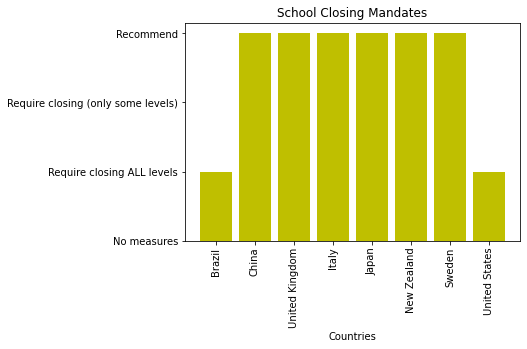

In [4]:
# Create bar plot displaying level of mandate for School Closing Mandates for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates['School_Mandates'] = ''

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['School_closing'] == 0), 'School_Mandates'] = 'No measures'
mandates.loc[(mandates['School_closing'] == 1), 'School_Mandates'] = 'Recommend'
mandates.loc[(mandates['School_closing'] == 2), 'School_Mandates'] = 'Require closing (only some levels)'
mandates.loc[(mandates['School_closing'] == 3), 'School_Mandates'] = 'Require closing ALL levels'

plt.bar(mandates['Country_name'],mandates['School_Mandates'], color = 'y')
plt.xticks(rotation='vertical')
plt.title('School Closing Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/School_Closing_Mandates.png')
plt.show()

### Workplace Mandates

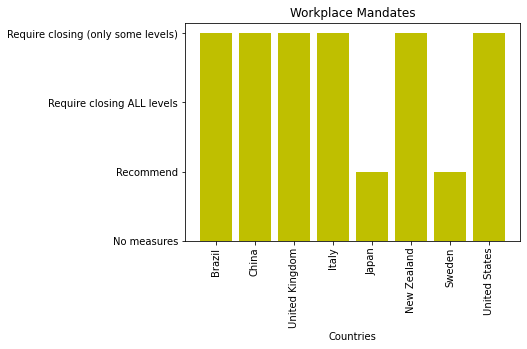

In [5]:
# Create bar plot displaying level of mandate for Workplace Closing Mandates for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates['Work_Mandates'] = ''

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['Workplace_closing'] == 0), 'Work_Mandates'] = 'No measures'
mandates.loc[(mandates['Workplace_closing'] == 1), 'Work_Mandates'] = 'Recommend'
mandates.loc[(mandates['Workplace_closing'] == 2), 'Work_Mandates'] = 'Require closing (only some levels)'
mandates.loc[(mandates['Workplace_closing'] == 3), 'Work_Mandates'] = 'Require closing ALL levels'

plt.bar(mandates['Country_name'],mandates['Work_Mandates'], color = 'y')
plt.xticks(rotation='vertical')
plt.title('Workplace Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/Workplace_Mandates.png')
plt.show()

### Stay Home Mandates

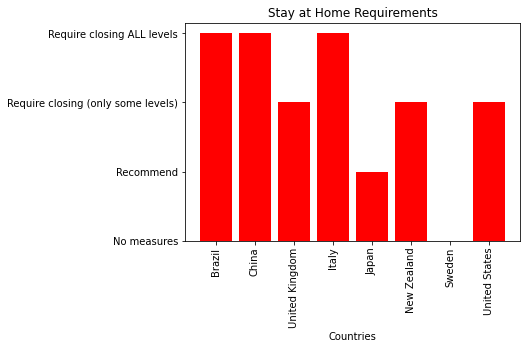

In [6]:
# Create bar plot displaying level of mandate for Stay at Home Requirements for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates['Stay_Home_Mandates'] = '' 

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['Stay_home'] == 0), 'Stay_Home_Mandates'] = 'No measures'
mandates.loc[(mandates['Stay_home'] == 1), 'Stay_Home_Mandates'] = 'Recommend'
mandates.loc[(mandates['Stay_home'] == 2), 'Stay_Home_Mandates'] = 'Require closing (only some levels)'
mandates.loc[(mandates['Stay_home'] == 3), 'Stay_Home_Mandates'] = 'Require closing ALL levels'

plt.bar(mandates['Country_name'],mandates['Stay_Home_Mandates'], color = 'r')
plt.xticks(rotation='vertical')
plt.title('Stay at Home Requirements')
plt.xlabel('Countries')
plt.savefig('output_mandates/Stay_Home_Mandates.png')
plt.show()

### Income Support Mandates

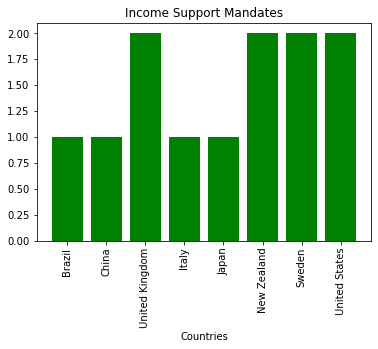

In [7]:
# Create bar plot displaying level of mandate for Income Support for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates['Income_Support_Mandates'] = '' 

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['Income_support'] == 0), 'Income_Support_Mandates'] = 'No measures'
mandates.loc[(mandates['Income_support'] == 1), 'Income_Support_Mandates'] = 'Gov replace < 50% salary lost'
mandates.loc[(mandates['Income_support'] == 2), 'Income_Support_Mandates'] = 'Gov replace >= 50% salary lost'

plt.bar(mandates['Country_name'],mandates['Income_support'], color = 'g')
plt.xticks(rotation='vertical')
plt.title('Income Support Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/Income_Support_Mandates.png')
plt.show()

### Facial Coverings Mandates

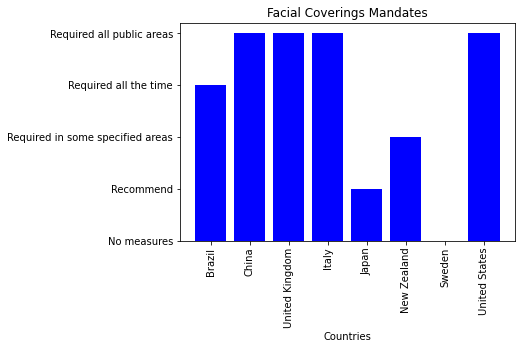

In [8]:
# Create bar plot displaying level of mandate for Facial Coverings for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates['School_Mandates'] = '' 

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['Facial_coverings'] == 0), 'Mask_Mandate'] = 'No measures'
mandates.loc[(mandates['Facial_coverings'] == 1), 'Mask_Mandate'] = 'Recommend'
mandates.loc[(mandates['Facial_coverings'] == 2), 'Mask_Mandate'] = 'Required in some specified areas'
mandates.loc[(mandates['Facial_coverings'] == 3), 'Mask_Mandate'] = 'Required all public areas'
mandates.loc[(mandates['Facial_coverings'] == 4), 'Mask_Mandate'] = 'Required all the time'

plt.bar(mandates['Country_name'],mandates['Mask_Mandate'], color = 'b')
plt.xticks(rotation='vertical')
plt.title('Facial Coverings Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/Facial_Coverings_Mandates.png')
plt.show()

In [9]:
# Transpose the .describe so I can run mean on 50% column to find what countries issued relaxed mandates and 
# which had strict mandates

# Change the value of columns from float to integer
info = mandates.astype({'School_closing': 'int', 'Workplace_closing': 'int', 'Stay_home': 'int', \
                            'Income_support': 'int', 'Facial_coverings': 'int'}) 
info.dropna()
info.describe().T

,count,mean,std,min,25%,50%,75%,max
School_closing,2410.0,1.697095,1.305365,0.0,0.0,2.0,3.0,3.0
Workplace_closing,2410.0,1.480083,1.184784,0.0,0.0,2.0,3.0,3.0
Stay_home,2410.0,0.966805,1.034351,0.0,0.0,1.0,2.0,3.0
Income_support,2410.0,1.091701,0.803876,0.0,0.0,1.0,2.0,2.0
Facial_coverings,2410.0,1.462241,1.609832,0.0,0.0,1.0,3.0,4.0


In [10]:
# Everything below 1.4 is relaxed mandate country. everything above is strict country
info_mean = info.describe().T['50%'].mean()
info_mean

1.4

In [11]:
#brazil country by itself with total mean labeled as brazil total and insight summary df for looking to see if there is any further insights to explore
brazil = info.loc[info['Country_name']=='Brazil']
brazil_mean = brazil.mean()
brazil_mean
brazil_sum = brazil_mean.sum()
brazil_sum
brazil_total = (brazil_sum/5)

#china country by itself with total mean labeled as china total and insight summary df for looking to see if there is any further insights to explore
china = info.loc[info['Country_name']=='China']
china_mean = china.mean()
china_mean
china_sum = china_mean.sum()
china_sum
china_total = (china_sum/5)

#uk country by itself with total mean labeled as uk total and insight summary df for looking to see if there is any further insights to explore
uk = info.loc[info['Country_name']=='United Kingdom']
uk_mean = uk.mean()
uk_mean
uk_sum = uk_mean.sum()
uk_sum
uk_total = (uk_sum/5)

#itlay country by itself with total mean labeled as italy total and insight summary df for looking to see if there is any further insights to explore
italy = info.loc[info['Country_name']=='Italy']
italy_mean = italy.mean()
italy_mean
italy_sum = italy_mean.sum()
italy_sum
italy_total = (italy_sum/5)

#japan country by itself with total mean labeled as japan total and insight summary df for looking to see if there is any further insights to explore
japan = info.loc[info['Country_name']=='Japan']
japan_mean = japan.mean()
japan_mean
japan_sum = japan_mean.sum()
japan_sum
japan_total = (japan_sum/5)

#New Zealand country by itself with total mean labeled as New Zealand total and insight summary df for looking to see if there is any further insights to explore
nz = info.loc[info['Country_name']=='New Zealand']
nz_mean = nz.mean()
nz_mean
nz_sum = nz_mean.sum()
nz_sum
nz_total = (nz_sum/5)

#sweden country by itself with total mean labeled as sweden total and insight summary df for looking to see if there is any further insights to explore
meatball = info.loc[info['Country_name']=='Sweden']
meatball_mean = meatball.mean()
meatball_mean
meatball_sum = meatball_mean.sum()
meatball_sum
meatball_total = (meatball_sum/5)

#united states country by itself with total mean labeled as united states total and insight summary df for looking to see if there is any further insights to explore
us = info.loc[info['Country_name']=='United States']
us
us_mean = us.mean()
us_mean
us_sum = us_mean.sum()
us_sum
us_total = (us_sum/5)

#summary df with country and average mandate
total = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Average Mandate':[china_total, brazil_total, us_total, italy_total,
                           uk_total,japan_total, nz_total, meatball_total]}

sum_df = pd.DataFrame(total)
sum_df

<ipython-input-11-d60b1d0ebcbb>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  brazil_mean = brazil.mean()
<ipython-input-11-d60b1d0ebcbb>:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  china_mean = china.mean()
<ipython-input-11-d60b1d0ebcbb>:19: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  uk_mean = uk.mean()
<ipython-input-11-d60b1d0ebcbb>:27: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  italy_mean = italy.mean()
<ipython-input-11-d60b1d0ebcbb>:35: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future ve

,Country,Average Mandate
0,China,1.995380
1,Brazil,1.860927
2,United States,1.820805
3,Italy,1.645946
4,United Kingdom,1.298693
5,Japan,0.792834
6,New Zealand,0.769024
7,Sweden,0.540864


In [12]:
# 1.4 was the mean of the 50% column above on .describe(), making the df below the Strict countries
strict_df = sum_df.loc[sum_df['Average Mandate']>=1.4]
strict_df

,Country,Average Mandate
0,China,1.995380
1,Brazil,1.860927
2,United States,1.820805
3,Italy,1.645946


In [13]:
# 1.4 was the mean of the 50% column above on .describe(), making the df below the relax countries
lax_df = sum_df.loc[sum_df['Average Mandate']<=1.4]
lax_df

,Country,Average Mandate
4,United Kingdom,1.298693
5,Japan,0.792834
6,New Zealand,0.769024
7,Sweden,0.540864


In [14]:
#brazil max number of cases
brazil= data.loc[data['CountryName']=='Brazil']
brazil_max = brazil['ConfirmedCases'].max()
brazil_max

#china max number of cases
china= data.loc[data['CountryName']=='China']
china_max = china['ConfirmedCases'].max()
china_max

#us max number of cases
us= data.loc[data['CountryName']=='United States']
us_max = us['ConfirmedCases'].max()
us_max

#italy max number of cases
italy= data.loc[data['CountryName']=='Italy']
italy_max = italy['ConfirmedCases'].max()
italy_max

#uk max number of cases
uk= data.loc[data['CountryName']=='United Kingdom']
uk_max = uk['ConfirmedCases'].max()
uk_max

#japan max number of cases
japan= data.loc[data['CountryName']=='Japan']
japan_max = japan['ConfirmedCases'].max()
japan_max

#new zealand max number of cases
nz= data.loc[data['CountryName']=='New Zealand']
nz_max = nz['ConfirmedCases'].max()
nz_max

#sweden max number of cases
meatball= data.loc[data['CountryName']=='Sweden']
meatball_max = meatball['ConfirmedCases'].max()
meatball_max

#summary df of country and total cases
totals = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Confirmed Cases':[china_max, brazil_max, us_max, italy_max,
                           uk_max,japan_max, nz_max, meatball_max]}


totals_df = pd.DataFrame(totals)

totals_df

,Country,Confirmed Cases
0,China,91241.0
1,Brazil,5439641.0
2,United States,8576725.0
3,Italy,449648.0
4,United Kingdom,1034914.0
5,Japan,101813.0
6,New Zealand,1603.0
7,Sweden,115927.0


In [15]:
#summary df with strict mandate country total confirmed cases
strict_max = totals_df.loc[totals_df['Country'].isin(['China','Brazil','United States','Italy'])]
strict_max

,Country,Confirmed Cases
0,China,91241.0
1,Brazil,5439641.0
2,United States,8576725.0
3,Italy,449648.0


In [16]:
#summary df with relaxed mandate country total confirmed cases
lax_max = totals_df.loc[totals_df['Country'].isin(['United Kingdom','Japan','New Zealand','Sweden'])]
lax_max

,Country,Confirmed Cases
4,United Kingdom,1034914.0
5,Japan,101813.0
6,New Zealand,1603.0
7,Sweden,115927.0


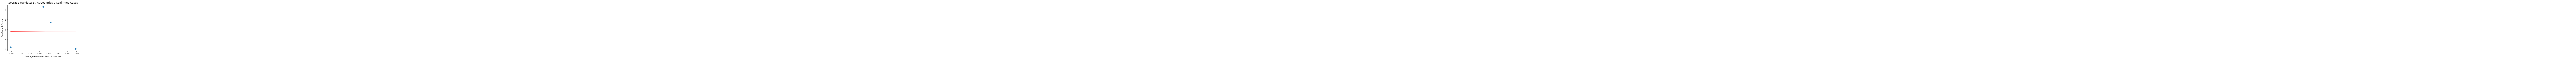

(0.005969848828868585, 0.9940301511711314)

In [17]:
x_values = strict_df['Average Mandate']
y_values = strict_max['Confirmed Cases']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Strict Countries v Confirmed Cases')
plt.xlabel('Average Mandate: Strict Countries')
plt.ylabel('Confirmed Cases')
plt.show()

#pearsonr for strict mandates v strict cases
correlation = st.pearsonr(strict_df['Average Mandate'], strict_max['Confirmed Cases'])
correlation

In [19]:
#linear regression strict mandates v strict deaths
x_values = strict_df['Average Mandate']
y_values = strict_df['Confirmed Deaths']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Strict Countries v Confirmed Deaths')
plt.xlabel('Average Mandate: Strict Countries')
plt.ylabel('Confirmed Deaths')
plt.show()

#pearsonr for strict mandates v strict deaths
correlation = st.pearsonr(strict_df['Average Mandate'], strict_df['Confirmed Deaths'])
correlation

KeyError: 'Confirmed Deaths'

In [ ]:
#linear regression relaxed mandates v relaxed cases
x_values = lax_df['Average Mandate']
y_values = lax_max['Confirmed Cases']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Lax Countries v Confirmed Cases')
plt.xlabel('Average Mandate: Lax Countries')
plt.ylabel('Confirmed Cases')
plt.show()

#pearsonr for relaxed mandates v relaxed cases
correlation = st.pearsonr(lax_df['Average Mandate'], lax_max['Confirmed Cases'])
correlation

In [ ]:
#linear regression relaxed mandates v relaxed deaths
x_values = lax_df['Average Mandate']
y_values = lax_d['Confirmed Deaths']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Lax Countries v Confirmed Deaths')
plt.xlabel('Average Mandate: Lax Countries')
plt.ylabel('Confirmed Deaths')
plt.show()

#pearsonr for relaxed mandates v relaxed deaths
correlation = st.pearsonr(lax_df['Average Mandate'], lax_d['Confirmed Deaths'])
correlation